In [90]:
# File              processData
# Author            Elias Le Boudec, elias.leboudec@epfl.ch
# Created           30 Dec 2018
# Last modified     30 Dec 2018
# Abstract          Process the data into a graph

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [91]:
nFeatures = 106
feature_names = ['Feature '+str(n+1) for n in range(nFeatures)]
# Load data into Panda tables

# data: Each line contains two ids of terrorist attacks.
# This file defines the edges connecting co-located terrorist 
# attacks performed by the same terrorist organization.
terroristAttacksLocOrgEdges = \
pd.read_table('./data/TerrorAttack/terrorist_attack_loc_org.edges',
             header=None, sep=' ', names=['id1','id2'])

# data: Each line contains two ids of terrorist attacks. This 
# file defines the edges connecting co-located terrorist attacks.
terroristAttacksLocEdges    = \
pd.read_table('./data/TerrorAttack/terrorist_attack_loc.edges',
             header=None, sep=' ', names=['id1','id2'])

# data: Contains the labels that we want to assign to each 
# terrorist attack entity.
terroristAttacksLabels = pd.read_table('./data/TerrorAttack/terrorist_attack.labels',
                                      header=None, sep=' ')

# data: Contains the various terrorist attack entities. Each line
# begins with the unique id of the entity followed by a 0-1 vector
# indicating the attributes that are present and the attributes that
# are absent. The last entry in the line is the correct class label 
# of the entity.

terroristAttacksNodes  = pd.read_table('./data/TerrorAttack/terrorist_attack.nodes',
                                      header=None, names=['id']+feature_names+['type'])
# Create a column for node index.
terroristAttacksNodes.reset_index(level=0, inplace=True)
terroristAttacksNodes = terroristAttacksNodes.rename(columns={'index':'node_index'})
# Create a conversion table from uid to node index.
uid2idx = terroristAttacksNodes[['node_index', 'id']]
uid2idx = uid2idx.set_index('id')

In [92]:
terroristAttacksLocOrgEdges = terroristAttacksLocOrgEdges.join(uid2idx,on='id1',rsuffix='_1')
terroristAttacksLocOrgEdges = terroristAttacksLocOrgEdges.join(uid2idx,on='id2',rsuffix='_2')
terroristAttacksLocEdges = terroristAttacksLocEdges.join(uid2idx,on='id1',rsuffix='_1')
terroristAttacksLocEdges = terroristAttacksLocEdges.join(uid2idx,on='id2',rsuffix='_2')

In [93]:
terroristAttacksLocOrgEdges.to_pickle('terroristAttacksLocOrgEdges.pkl')
terroristAttacksLocEdges.to_pickle('terroristAttacksLocEdges.pkl')

In [94]:
nodes = terroristAttacksNodes.copy()
nodes['timestamp']    = None

In [95]:
# Add timestamp
nodes = terroristAttacksNodes.copy()
for n in nodes['id']:
    year = n[-8:-4]
    month= n[-4:-2]
    day  = n[-2:]

    try:
        timestamp = datetime.datetime(int(year),int(month),int(day))
    except ValueError:
        p = n.split('document/')[1]
        year = p[0:4]
        month = p[5:7]
        day = p[8:10]
        h = p[11:13]
        m = p[14:16]
        s = p[17:19]
        try:
            timestamp = datetime.datetime(int(year),
                                          int(month),
                                          int(day),
                                          int(h),
                                          int(m),
                                          int(s))
        except:
            timestamp = None
    index = nodes.index[nodes['id']==n].tolist()[0]
    nodes.at[index,'timestamp'] = timestamp
    

In [96]:
# Add Organisation
nodes['organisation'] = None
nodesLink = nodes['id']
organisations = []

for i in range(len(nodesLink)):
    
    organisation = ''
    list = []
    organisationAndDate      = nodesLink[i].split('#')[1]
    organisationAndDateSplit = organisationAndDate.split('_')
    
    for j in range(len(organisationAndDateSplit)-1):
        organisation = organisation + organisationAndDateSplit[j]

    nodes.at[i, 'organisation'] = organisation

In [97]:
np.save('nodes.npy',nodes)
nodes.to_pickle('nodes.pkl')

In [98]:
locOrgEdgesArray = terroristAttacksLocOrgEdges.values[:,2:].tolist()
locEdgesArray = terroristAttacksLocEdges.values[:,2:].tolist()

In [99]:
graphLocOrg = nx.Graph(locOrgEdgesArray)
graphLoc    = nx.Graph(locEdgesArray)
graphLocOrg.number_of_nodes()

260

In [100]:
coordsLocOrg = nx.spring_layout(graphLocOrg,dim = 2,k =.3,seed=0)
coordsLoc    = nx.spring_layout(graphLoc   ,dim = 2,k =.3,seed=0)

/Users/figinienea/miniconda3/envs/ntds_2018/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


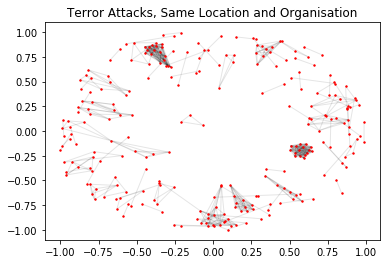

In [101]:
nx.draw_networkx_nodes(graphLocOrg, coordsLocOrg,node_size=2)
nx.draw_networkx_edges(graphLocOrg, coordsLocOrg, alpha=.1)
plt.title('Terror Attacks, Same Location and Organisation')
pass

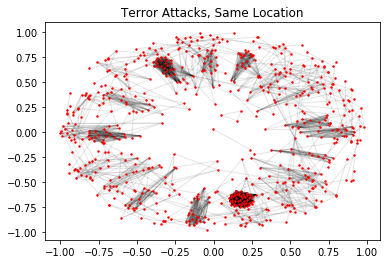

In [102]:
nx.draw_networkx_nodes(graphLoc, coordsLoc,node_size=2)
nx.draw_networkx_edges(graphLoc, coordsLoc, alpha=.1)
plt.title('Terror Attacks, Same Location')
pass

In [103]:
np.save('graphs.npy',[graphLoc,graphLocOrg])

In [104]:
print(nodes.columns.values)

['node_index' 'id' 'Feature 1' 'Feature 2' 'Feature 3' 'Feature 4'
 'Feature 5' 'Feature 6' 'Feature 7' 'Feature 8' 'Feature 9' 'Feature 10'
 'Feature 11' 'Feature 12' 'Feature 13' 'Feature 14' 'Feature 15'
 'Feature 16' 'Feature 17' 'Feature 18' 'Feature 19' 'Feature 20'
 'Feature 21' 'Feature 22' 'Feature 23' 'Feature 24' 'Feature 25'
 'Feature 26' 'Feature 27' 'Feature 28' 'Feature 29' 'Feature 30'
 'Feature 31' 'Feature 32' 'Feature 33' 'Feature 34' 'Feature 35'
 'Feature 36' 'Feature 37' 'Feature 38' 'Feature 39' 'Feature 40'
 'Feature 41' 'Feature 42' 'Feature 43' 'Feature 44' 'Feature 45'
 'Feature 46' 'Feature 47' 'Feature 48' 'Feature 49' 'Feature 50'
 'Feature 51' 'Feature 52' 'Feature 53' 'Feature 54' 'Feature 55'
 'Feature 56' 'Feature 57' 'Feature 58' 'Feature 59' 'Feature 60'
 'Feature 61' 'Feature 62' 'Feature 63' 'Feature 64' 'Feature 65'
 'Feature 66' 'Feature 67' 'Feature 68' 'Feature 69' 'Feature 70'
 'Feature 71' 'Feature 72' 'Feature 73' 'Feature 74' 'Feature 75'
 